<style>
    h1{ font-family:"Times New Roman",serif;
        color:darkorange;
        background-color:black;
        text-align:center;
        text-shadow:2px 2px 0px red, 0 0 5px silver;
        border: #ffa000 solid 5px;
        height:1.5em;
    }
    h2{ font-weight: ;
    }
</style>
<h1> I-PHOQS Laboratory Training Platform </h1>
 <h2> <b>Gerchberg-Saxton algorithm: Phase retrieval </b></h2>
<h><i> Notebook developed by Federico Avella and Luca Labate</i> <h>


<style>
    img {
  display: block;
  margin: auto;
  width: 400px;
    }
</style>
<h2> Brief introduction to <strong>LightPipes for Python</strong> </h2>
<p style="text-align:left"> <i>by Gleb Vdovin and Fred van Goor</i></p>
    <img src="./imgs_folder/lp_logo.png">

<style>
    p {font-size:16pt;
        }
</style>
<p> LightPipes is a Python package provided with several functions to simulate coherent optical devices when the diffraction is essential. </p>
<p> Each function represents an optical element: apertures, lenses, filters, and so on. You can in practice simulate an optical bench before mounting it!</p>
<p> The main concept is that every <i>optical</i> function returns the fields passing through the specific optical element.</p>
<p> For more details, please refer to <a href="https://opticspy.github.io/lightpipes">https://opticspy.github.io/lightpipes</a>, where you can find several tutorials and some <a href="https://opticspy.github.io/lightpipes/computerprac.html#computerprac">Computer practicals</a> to study optics performing "computer experiments".</p>

<style>
    img {
  display: block;
  margin: auto;
  width: 800px;
    }
    p{
        font-size:16pt;
    }
</style>
<h3> An example: Michelson interferometer </h3>
<img src="./imgs_folder/Michelson_setup.png">


In [254]:
from LightPipes import *
import matplotlib.pyplot as plt

wavelength=632.8*nm #wavelength of HeNe laser
size=20*mm # size of the grid
N=500 # number (NxN) of grid pixels
R=9*mm # laser beam radius
z1=8*cm # length of arm 1
z2=7*cm # length of arm 2
z3=3*cm # distance laser to beamsplitter
z4=5*cm # distance beamsplitter to screen
Rbs=0.5 # reflection beam splitter
tx=0.5*mrad; ty=0.5*mrad # tilt of mirror 1

#Generate a laser beam:
F=Begin(size,wavelength,N)
F=GaussBeam(F, R)

#Propagate to the beamsplitter:
F=Forvard(F,z3)

#Split the beam and propagate to mirror #2:
F2=IntAttenuator(F, 1-Rbs)
F2=Forvard(F2,z2)

#Introduce aberration and propagate back to the beamsplitter:
F2=Tilt(F2,tx,ty)
F2=Forvard(F2,z2)
F2=IntAttenuator(F2,Rbs)

#Split off the second beam and propagate to- and back from the mirror #1:
F10=IntAttenuator(F,Rbs)
F1=Forvard(F10,z1*2)
F1=IntAttenuator(F1,1-Rbs)

#Recombine the two beams and propagate to the screen:
F=BeamMix(F1,F2)
F=Forvard(F,z4)
I=Intensity(F)
P=Phase(F)

In [ ]:
#Present the results:
s1 =    r'LightPipes for Python ' + LPversion + '\n\n'\
        r'Michelson interferometer with mirror tilt in one arm' + '\n'
s2 =    r'Michelson.py'+ '\n\n'\
        f'size = {size/mm:4.2f} mm' + '\n'\
        f'$\\lambda$ = {wavelength/um:4.2f} $\\mu$m' + '\n'\
        f'N = {N:d}' + '\n'\
        f'R = {R/mm:4.2f} mm beam radius of the laser' + '\n'\
        f'z1 = {z1/mm:4.2f} mm length of arm 1' + '\n'\
        f'z2 = {z2/mm:4.2f} mm length of arm 2' + '\n'\
        f'z3 = {z3/mm:4.2f} mm distance from the laser to the beam splitter' + '\n'\
        f'z4 = {z4/mm:4.2f} mm distance from the beam splitter to the screen' + '\n'\
        f'tx, ty = {tx/mrad:4.2f}, {ty/mrad:4.2f} mrad tilt of mirror 2' + '\n\n'\
        r'${\copyright}$ Fred van Goor, June 2020'

fig=plt.figure(figsize=(6,9));
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312);ax2.axis('off')
ax3 = fig.add_subplot(313);ax3.axis('off')
ax1.imshow(I,cmap='jet',extent=[0,size,0,size]);ax1.set_title('intensity pattern')
ax2.text(0.0,0.6,s1,fontsize=12, fontweight='bold')
ax3.text(0.0,0.50,s2)

<h2> <strong> Finally, let's start! </strong></h2>

<style>
    p {
        font-size:16pt;
        }
    code{
        color:white
        }
    li {
        margin:10px;
        font-size:14pt;
        }
    ol{
        line-height:130%
        }
</style>
<h3>Main LightPipes functions for this tutorial</h3>
<ol>
    <li><code> F=Begin(size,wl,N)</code>: any LightPipes "experiments" starts with the instance of a <i>.field.Field</i> object returning an NxN complex-values matrix representing a field with carrier wavelength <i>wl</i>. The inizialization is a field of uniform amplitude and flat phase (i.e. a plane wave). Here is where you will store your <i> working </i> field. <strong>WARNING</strong>: LightPipes wants square images! </li>
    <li><code>F=Forvard(z,Fin)</code>: this is a FFT propagator, solving the Helmholtz equation in terms of the Fourier transforms of input and diffracted fields. It propagates an input field <i>Fin</i> to distance <i>z</i>, returning the diffracted wave function in the Fresnel approximation. LightPipes has other propagators (direct integration, FD method,...), this is just <u> faster</u>.</li>
    <li><code>F=SubIntensity(intesity:np.ndarray|int|float,F)</code>: this function substitutes an <i> intensity</i> distribution to the <i>.field.Field</i> F</li>
    <li><code>Intesity(F),Phase(F)</code>: these retrieve intensity and phase (wrapped or unwrapped!) of <i>.field.Field</i> F </li>
</ol> 

#### Propagation

$$
\nabla^2E+k^2E=0 \xrightarrow[\text{paraxial approximation}]{}E(x,y|z) = \dfrac{1}{i\lambda_0z}\int_{\mathcal{T_0}}E(x\prime,y\prime|0)T_0(x\prime,y\prime)\exp{\left[i\dfrac{k}{2z}((x-x\prime)^2+(y-y\prime)^2)\right]}dx\prime dy\prime \times e^{ik_0z}
$$

<style>
    img {
  display: block;
  margin: auto;
  width: 1000px;
    }
</style>
<h4> Recap the Gerchberg-Saxton loop</h4>
<img src="./imgs_folder/gs_sketch.png">

<h3><li> Imports and running PreProcessing</h3>

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from LightPipes import *

>>	AuxiliaryClass successfully created
>>	OK! Directory exists
>>	OK, file A.tif exists
>>	OK, file B.tif exists
>>	OK, file C.tif exists
Final image actual size: 0.016000, 0.016000
>>	ImageClass successfully created
>>	ImageClass successfully created
>>	ImageClass successfully created
>>	Image A.tif successfully loaded. Shape: (2616, 3896, 3). Calibration: {'y': 5e-06, 'x': 5e-06}
>>	Image B.tif successfully loaded. Shape: (2616, 3896, 3). Calibration: {'y': 5e-06, 'x': 5e-06}
>>	Image C.tif successfully loaded. Shape: (2616, 3896, 3). Calibration: {'y': 5e-06, 'x': 5e-06}
>>	Channel 'R' selected for A.tif image. New shape: (2616, 3896)
>>	Channel 'R' selected for B.tif image. New shape: (2616, 3896)
>>	Channel 'R' selected for C.tif image. New shape: (2616, 3896)
>>	Original shape: (2616, 3896)
>>	Resampled shape: (1308, 1948). New calibration: {'y': 1e-05, 'x': 1e-05}
>>	Original shape: (2616, 3896)
>>	Resampled shape: (1308, 1948). New calibration: {'y': 1e-05, 'x': 1e-05}
>>	Origi

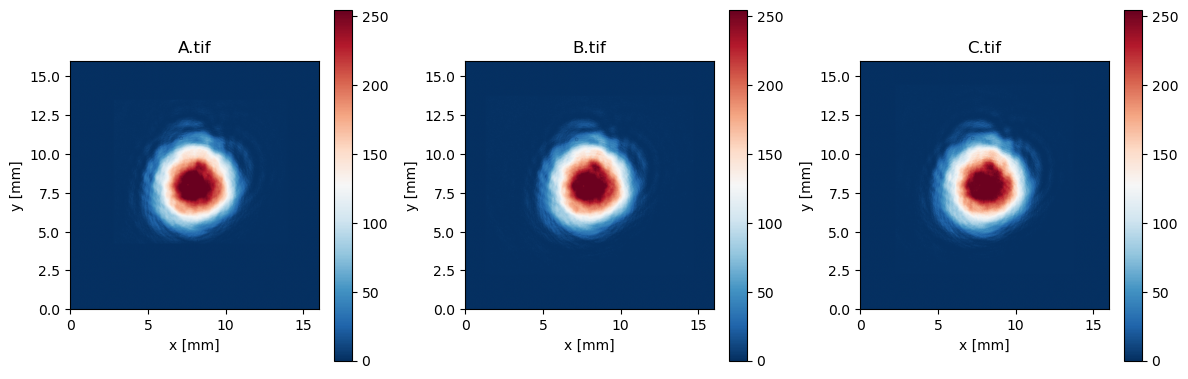

In [29]:
%run "PreProcessing.ipynb"

<style>
    p {
        font-size:12pt;
        }
</style>
<h3><li> Clipping the images</li><h3>
 <p>Because the BG subtraction can lead to negative values for the intesity distributions, clip the negative values to 0.</p>
 <p>We can do this because after the BG adjustment, the average BG value in another part of the image is kind of small!</p>

In [ ]:
fig, ax = plt.subplots(1, Nimages, figsize=(12,4*Nimages))
imageDict = dict()
for i,img in enumerate(inputImages):
    Ny,Nx = img.ysize,img.xsize
    yMax = (Ny+.5)*img.roiCalibration['y']
    xMax = (Nx+.5)*img.roiCalibration['x']
    imageDict[img.imageName] = dict()
    imageDict[img.imageName]['data'] = np.where(img.centeredROI<0,0,img.centeredROI)
    imageDict[img.imageName]['xlims'] = [0, xMax]
    imageDict[img.imageName]['ylims'] = [0, yMax]
    imageDict[img.imageName]['calibration'] = img.roiCalibration
    image=ax[i].imshow(imageDict[img.imageName]['data'],
                       extent=[0, xMax, 0, yMax],
                       cmap='RdBu_r',
                       aspect='equal',
                       vmin=0,
                       vmax=255)
    ax[i].set_title(img.imageName)
    print(img.imageName,
          "shape: "+str(img.centeredROI.shape),
          "calibration: "+str(img.roiCalibration),
          "box: [xMax = {:.2f}, yMax = {:.2f}]".format(xMax,yMax),
          f"Intensity max value:{imageDict[img.imageName]['data'].max():.2f}",
          sep="\n\t-",
          end="\n")
    plt.colorbar(image,shrink=.3)
    

<h2>Two plane Gerchberg-Saxton loop</h2>

In [4]:
wavelength = 632.8*nm
size = imageDict['A.tif']['xlims'][1]
Niterations = 50
N=len(imageDict['A.tif']['data'])
F=Begin(size, wavelength, N)
z=40*cm
for k in range(Niterations):
    print(f"interation: {k+1}/{Niterations}",end='\r',flush=True)
    F=SubIntensity(imageDict['A.tif']['data'],F)
    F=Forvard(z,F)
    F=SubIntensity(imageDict['C.tif']['data'],F)
    F=Forvard(-z,F)

interation: 50/50

In [ ]:
from scipy.constants import pi
#The recovered far- and near field and their phase- and intensity
#distributions (phases are unwrapped (i.e. remove multiples of PI)):
Fnear_rec=F
Inear_rec=Intensity(0,Fnear_rec)
Phase_near_rec=Phase(Fnear_rec)
Phase_near_rec=PhaseUnwrap(Phase_near_rec)

Ffar_rec=Forvard(z,F)
Ifar_rec=Intensity(0,Ffar_rec)
Phase_far_rec=Phase(Ffar_rec)
Phase_far_rec=PhaseUnwrap(Phase_far_rec)

#Plot the recovered intensity- and phase distributions:
fig, ax = plt.subplots(3, 2, figsize=(8,8))
vmin,vmax=(-pi,pi)
extent = np.array([imageDict['A.tif']['xlims'][0], imageDict['A.tif']['xlims'][1],
         imageDict['A.tif']['ylims'][0], imageDict['A.tif']['ylims'][1]])*mm

img00=ax[0,0].imshow(imageDict['A.tif']['data'],cmap='jet',extent=extent)
ax[0,0].set_title(f'Measured Fluence near field: A.tif')
fig.colorbar(img00,shrink=.5)

img01=ax[0,1].imshow(imageDict['C.tif']['data'],cmap='jet',extent=extent)
ax[0,1].set_title(f'Measured Fluence far field:C.tif')
fig.colorbar(img01,shrink=.5)

img10=ax[1,0].imshow(Inear_rec,cmap='jet')
ax[1,0].set_title('Recovered Intensity near field')
fig.colorbar(img10,shrink=.5)

img11=ax[1,1].imshow(Ifar_rec,cmap='jet')
ax[1,1].set_title('Recovered Intensity far field')
fig.colorbar(img11,shrink=.5)

img20=ax[2,0].imshow(Phase_near_rec,vmin=vmin,vmax=vmax,cmap='jet')
ax[2,0].set_title('Recovered phase near field')
fig.colorbar(img20,shrink=.5)

img21=ax[2,1].imshow(Phase_far_rec,vmin=vmin,vmax=vmax,cmap='jet')
ax[2,1].set_title('Recovered phase far field')
fig.colorbar(img21,shrink=.5)
fig.tight_layout()


<h2> Multi Planes Gerchberg-Saxton algorithm </h2>

In [ ]:
wavelength = 632.8*nm
size = imageDict['A.tif']['xlims'][1]
N=len(imageDict['A.tif']['data'])
F=Begin(size, wavelength, N)
FarFieldName = 'C.tif'
NearFieldsDict = {key:imageDict[key] for key in imageDict.keys() if key!=FarFieldName}
distances = [20*cm,20*cm]
total_distance = np.sum(distances)
Niterations = 50
for k in range(Niterations):
    print(f"iteration: {k+1}/{Niterations}",end='\r',flush=True)
    F=SubIntensity(imageDict[FarFieldName]['data'],F)
    F=Forvard(-total_distance,F)
    for j,key in enumerate(NearFieldsDict.keys()):
        F=SubIntensity(NearFieldsDict[key]['data'],F)
        F=Forvard(distances[j],F)

<style>
    code{color:white}
</style>
<h3> Preparing the <code>plt.figure</code> object</h3>

In [ ]:
mosaic = np.array([[f"Measured fluence:{name}"for name in imageDict.keys()],
          [f"Rebuilt fluence:{name}"for name in imageDict.keys()],
          [f"Retrieved phase:{name}"for name in imageDict.keys()]])
fig,ax = plt.subplot_mosaic(mosaic,figsize=(12,8))
for name in mosaic.flatten():
    ax[name].set_title(name)
    ax[name].set_xlabel('x [mm]')
    ax[name].set_ylabel('y [mm]')
fig.tight_layout()

<h3> Plotting the fluence measurements, rebuilt intensities and relative phase at each plane <code>z</code></h3>
 <h4>The last iteration of GS loop (variable <code>F</code>) retrieved the complex-values FarField</h4>

In [ ]:
Ffar_rec=F
FarFieldImages=[imageDict[FarFieldName]['data'],Intensity(0,Ffar_rec),Phase(Ffar_rec,True)]
search = [FarFieldName in m for m in mosaic.flatten()]
FarFieldNames = mosaic.flatten()[search]
extent = np.array([imageDict[FarFieldName]['xlims'][0], imageDict[FarFieldName]['xlims'][1],
                   imageDict[FarFieldName]['ylims'][0], imageDict[FarFieldName]['ylims'][1]])*mm
for j,label in enumerate(FarFieldNames):
    tmp_img=ax[label].imshow(FarFieldImages[j],cmap='jet',extent=extent*1e3)
    if "phase" in label:
        tmp_img.set_clim(0,2*pi)
    fig.colorbar(tmp_img,shrink=.5)
fig

<h4>Retrieving previous planes back-propagating the rebuilt FarField</h4>

In [ ]:
for j,NFname in enumerate(NearFieldsDict.keys()):
    search = [NFname in m for m in mosaic.flatten()]
    NFnames = mosaic.flatten()[search]
    extent = np.array([imageDict[NFname]['xlims'][0], imageDict[NFname]['xlims'][1],
                       imageDict[NFname]['ylims'][0], imageDict[NFname]['ylims'][1]])*mm
    z = np.sum(distances[j:])
    print(NFname+f": {z*1e2=} cm")
    tmp_NF=Forvard(-z,F)
    NearFieldImages=[imageDict[NFname]['data'],Intensity(0,tmp_NF),Phase(tmp_NF,True)]
    for l,label in enumerate(NFnames):
        tmp_img=ax[label].imshow(NearFieldImages[l],cmap='jet',extent=extent*1e3)
        if "phase" in label:
            tmp_img.set_clim(0,2*pi)
        fig.colorbar(tmp_img,shrink=.5)
fig

<h1>Extras</h1>
<h3> Of course, all of this can be embedded in a Python class!</h3>
<p> First clip the centered roi</p>


In [68]:
import importlib
from importnb import imports
from scipy.constants import pi

with imports("ipynb"):
    import AuxiliaryTools
    importlib.reload(AuxiliaryTools)

for img in inputImages:
    img.centeredROI = np.where(img.centeredROI<0,0,img.centeredROI)

In [31]:
class LengthError(Exception):
    """Custom exception for length errors."""
    pass

def color_txt(txt:str,r=128,g=128,b=128):
    string = f"\033[38;2;{r};{g};{b}m{txt}\033[0m"
    return string

<p> Define <code style="color:white">class GerSaxPhaseRetriever </code> </p>

In [61]:
class GerSaxPhaseRetriever(object):
    def __init__(self, *inputImages:AuxiliaryTools.ImageClass, 
                 distances:np.ndarray[float]|list[float]|tuple[float],
                 wavelength:float,
                 ordering:np.ndarray[int]|list[int]|tuple[int]):
        if len(ordering) != len(inputImages):
            raise LengthError("The number of images and the ordering list must be coherent")
        if isinstance(ordering, (list,tuple)):
            ordering = np.array(ordering,dtype=int)
        if len(distances) != len(inputImages)-1:
            raise LengthError(f"The number of distances must be {len(inputImages)-1}")
        _,counts = np.unique_counts(ordering)
        if np.any(counts>1):
            raise ValueError("The ordering list must contain unique values")
        self.inputImages = tuple(inputImages[i] for i in ordering)
        self.wavelength = wavelength
        self.distances = distances
        self.total_length = np.sum(distances)
        self.imagesNames = [img.imageName for img in self.inputImages]
        self.size = self.inputImages[0].xsize*self.inputImages[0].roiCalibration['x']
        self.FFname = self.imagesNames[-1]

    def __round_trip__(self,F,k,J,Niterations):
        """Perform a round trip for the k-th iteration."""
        F=SubIntensity(self.inputImages[-1].centeredROI,F)
        F=Forvard(-self.total_length,F)
        for j,img in enumerate(self.inputImages[:-1]):
            print(color_txt(f"iteration: {k+1}/{Niterations}",int(255*(J-j-1)/J),255,0),end='\r',flush=True)
            F=SubIntensity(img.centeredROI,F)
            F=Forvard(distances[j],F)
        return F

    def GS_algorithm(self,Niterations:int=50):
        N = self.inputImages[0].xsize
        F = Begin(self.size, self.wavelength,N)
        J = len(self.inputImages[:-1])
        for k in range(Niterations):
            print(color_txt(f"iteration: {k+1}/{Niterations}",255,255,0),end='\r',flush=True)
            F = self.__round_trip__(F,k,J,Niterations)
        self.FarField = F

    def RetrieveIntensity(self,name:str):
        if name not in self.imagesNames:
            raise ValueError(f"Image {name} not found in the input images")
        if name == self.FFname:
            return Intensity(0,self.FarField)
        else:
            index = self.imagesNames.index(name)
            z = np.sum(self.distances[index:])
            F = Forvard(-z,self.FarField)
            return Intensity(0,F)
    def RetrievePhase(self,name:str,unwrap:bool=False):
        if name not in self.imagesNames:
            raise ValueError(f"Image {name} not found in the input images")
        if name == self.FFname:
            return Phase(self.FarField,unwrap=unwrap)
        else:
            index = self.imagesNames.index(name)
            z = np.sum(self.distances[index:])
            F = Forvard(-z,self.FarField)
            return Phase(F,unwrap=unwrap)


In [62]:
# Example usage    
GS = GerSaxPhaseRetriever(*inputImages, distances=[20*cm,20*cm], wavelength=632.8*nm, ordering=np.array([0,1,2]))
GS.GS_algorithm()

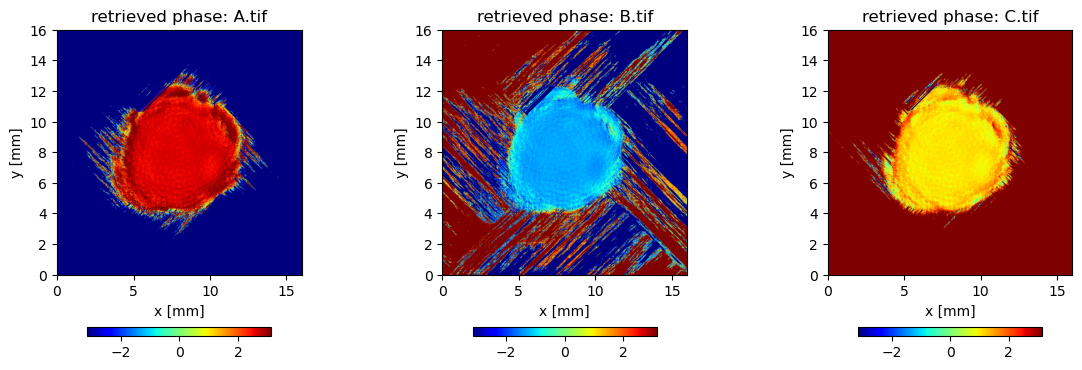

In [69]:
pi = 3.141592653589793
ax_titles = [f"retrieved phase: {name}" for name in GS.imagesNames]
fig,ax = plt.subplot_mosaic([ax_titles],figsize=(12,4))
extent = np.array([0,GS.size,0,GS.size])*1e3
for i,name in enumerate(GS.imagesNames):
    is_img=ax[ax_titles[i]].imshow(GS.RetrievePhase(name,unwrap=True),cmap='jet',vmax=pi,vmin=-pi,extent=extent)
    fig.colorbar(is_img,shrink=.5,location='bottom')
    ax[ax_titles[i]].set_title(ax_titles[i])
    ax[ax_titles[i]].set_xlabel('x [mm]')
    ax[ax_titles[i]].set_ylabel('y [mm]')
fig.tight_layout()